In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


# Scipy.stats

Список с распределениями, поддерживаемыми библиотекой

https://docs.scipy.org/doc/scipy/reference/stats.html

In [2]:
import scipy.stats as st

- rvs –– *Random variates*
- pdf –– *Probability density function* –– плотность распределения
- cdf –– *Cumulative distribution function* –– функция распределения
- ppf –– *Percent point function* –– обратная к cdf, то есть для заданного значения функции распределения возвращает точку при которой достигается это значение.


### График плотности нормального распределения

Плотность нормального распределения задана на всем $\mathbb{R}$, поэтому для построения графика надо отрезать хвосты распределения. Для этого воспользуемся `ppf`. 

Вспомним правило трех сигм: вероятность того, что случайная величина не отклонится от своего математического ожидания более чем на три среднеквадратических отклонения, равна $99.72\%$. Поэтому в качестве крайней левой точки возьмем знчение `x = st.norm.ppf(0.001)` -- выкинем 0.1\% плотности левого хвоста. Аналогично с правыым хвостом.

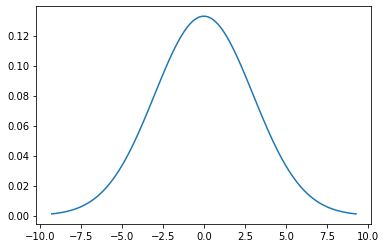

<bound method rv_continuous.pdf of <scipy.stats._continuous_distns.norm_gen object at 0x000001B34FB2C5C0>>

In [3]:
grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=3), st.norm.ppf(0.999, loc=0, scale=3), 100)

# У Norm параметр scale это просто sigma
plt.plot(grid, st.norm.pdf(grid, loc=0, scale=3))
plt.show()

st.norm.pdf

### Функция распределения нормального распределения

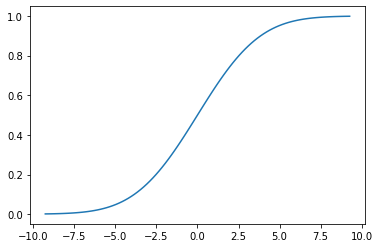

In [4]:
plt.plot(grid, st.norm.cdf(grid, scale=3))
plt.show()

### 0.025-квантиль

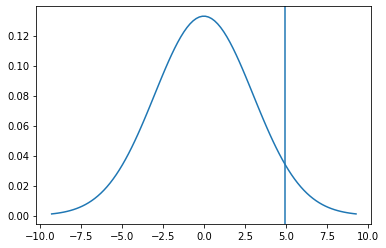

In [5]:
plt.axvline(st.norm.ppf(0.95, scale=3))
plt.plot(grid, st.norm.pdf(grid, scale=3))
plt.show()

Как тут https://openintro.shinyapps.io/dist_calc/ визуализируем вычисление $P(X <= a)$

$P(X <= a)$ это по определению значение функции распределения $F_X(x)$ в точке $a$. Поэтому используем метод `cdf(a)`

In [6]:
from ipywidgets import interactive
from IPython import display

In [7]:
def ppf_visualization(c):
    print('Площадь P(X <= c):', '%.4f' % (st.norm.cdf(c, scale=3)))
    
    grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=3), st.norm.ppf(0.999, loc=0, scale=3), 100)

    # Вертикальная линия
    plt.axvline(c)
    # График плотности распределения
    plt.plot(grid, st.norm.pdf(grid, scale=3))
    # Заполним пространство под графиком плотности левее  вертикальной линии
    plt.fill_between(grid[grid<c], st.norm.pdf(grid[grid<c], loc=0, scale=3), color="royalblue", alpha=0.3)
    plt.show()

v = interactive(
    lambda c: ppf_visualization(c), c=(-10, 10, 0.25),
)

display.display(v)

interactive(children=(FloatSlider(value=0.0, description='c', max=10.0, min=-10.0, step=0.25), Output()), _dom…

### Выборочные статистики

Сгенерируем $N = 10$ реализаций нормально распределенной случайной величины из $\mathcal{N}(0,1)$. То есть получим массив из 10 реализаций случайной величины.

In [8]:
N = 10
x = st.norm.rvs(loc=0, scale=1, size=N)
print('Выборка:', x)

Выборка: [-2.26259388 -1.2720667   0.34051219 -0.41028622 -0.08467245  1.66984709
  0.64411453 -1.19367485  1.25966466 -1.91641255]


Можно использовать все что есть в `numpy`:

In [9]:
print(type(x))
print('Выборочное среднее:\t', "%.4f" % x.mean())
print('Выборочная медиана:\t', "%.4f" % np.median(x))
print('Выборочная дисперсия:\t', "%.4f" % x.std())
print('Максимальное значение:\t', "%.4f" % x.max())
print('Минимальное значение:\t', "%.4f" % x.min())

<class 'numpy.ndarray'>
Выборочное среднее:	 -0.3226
Выборочная медиана:	 -0.2475
Выборочная дисперсия:	 1.2600
Максимальное значение:	 1.6698
Минимальное значение:	 -2.2626


**Пример:** Логнормальное распределение

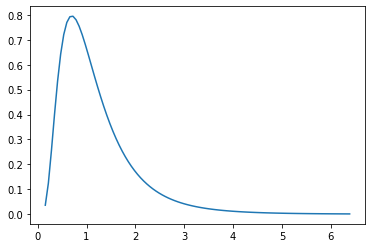

Теоретическое среднее:			 1.1972
Теоретическая медиана:			 1.0000
Теоретическая дисперсия:		 0.6211
Теоретический коэффициент ассиметрии:	 2.2601
Теоретический коэффициент эксцесса:	 10.2734


In [10]:
s = 0.6

grid = np.linspace(st.lognorm.ppf(0.001, s), st.lognorm.ppf(0.999, s), 100)

plt.plot(grid, st.lognorm.pdf(grid, s))
plt.show()

mean, var, skew, kurt = st.lognorm.stats(s, moments='mvsk')
median = st.lognorm.median(s)
print('Теоретическое среднее:\t\t\t', "%.4f" % mean)
print('Теоретическая медиана:\t\t\t', "%.4f" % median)
print('Теоретическая дисперсия:\t\t', "%.4f" % var)
print('Теоретический коэффициент ассиметрии:\t', "%.4f" % skew)
print('Теоретический коэффициент эксцесса:\t', "%.4f" % kurt)

Выборочный коэффициент ассиметрии:	 2.2837
Выборочный коэффициент эксцесса:	 10.2470
Интерквартильынй размах:		 0.8158
Медиана:		 0.9986
Выборочное среднее:		 1.1872


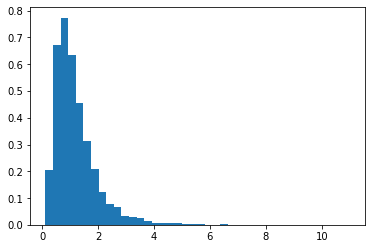

In [11]:
N = 10000
s = 0.6
X = st.lognorm.rvs(s, size=N)

plt.hist(X, density=True, bins=40)

print('Выборочный коэффициент ассиметрии:\t', "%.4f" % st.skew(X))
print('Выборочный коэффициент эксцесса:\t', "%.4f" % st.kurtosis(X))
print('Интерквартильынй размах:\t\t', "%.4f" % st.iqr(X))
print('Медиана:\t\t', "%.4f" % np.median(X))
print('Выборочное среднее:\t\t', "%.4f" % np.mean(X))

**Пример**: Экспоненциальное распределение $\text{Exp}(3)$

- Сгенерируем выборку
- Построим плотность распределения
- Построим гистограмму по выборке



In [17]:
pd.Series(X).describe()

count    10000.000000
mean         1.187178
std          0.775347
min          0.110734
25%          0.670221
50%          0.998649
75%          1.485989
max         10.999084
dtype: float64

## Пример на двух выборках

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [14]:
std_x = 1
std_y = 1
mu_x = np.random.uniform(-1,1) 
mu_y = np.random.uniform(-1,1)

In [15]:
x = norm.rvs(size = 1000, loc = mu_x, scale = std_x)
y = norm.rvs(size = 10000, loc = mu_y, scale = std_y)

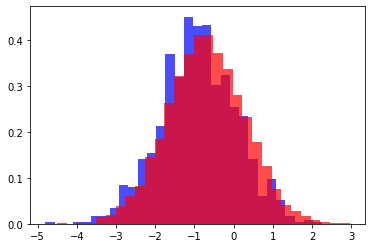

In [16]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=30, density=True, color='red', alpha=0.7)
plt.show()

In [66]:
pd.Series(y).describe()

count    1000.000000
mean        0.892298
std         2.026000
min        -5.569730
25%        -0.524539
50%         0.935509
75%         2.321073
max         6.395474
dtype: float64

In [71]:
pd.Series(x).describe()

count    1000.000000
mean        0.730626
std         1.038127
min        -2.806150
25%         0.009513
50%         0.730986
75%         1.441993
max         3.984569
dtype: float64